In [1]:
import os
import pandas as pd

In [2]:
current_dir = os.getcwd()
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
path_file = os.path.join(current_dir, "datasets/iris.data")
data = pd.read_csv(path_file, header=None, names=column_names)

In [3]:
X = data.drop('species', axis=1)
y = data['species']

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [8]:
# y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [8]:
y_pred = svm_clf.predict(X_test)

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia (SVM):', accuracy)

Acurácia (SVM): 1.0


In [12]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



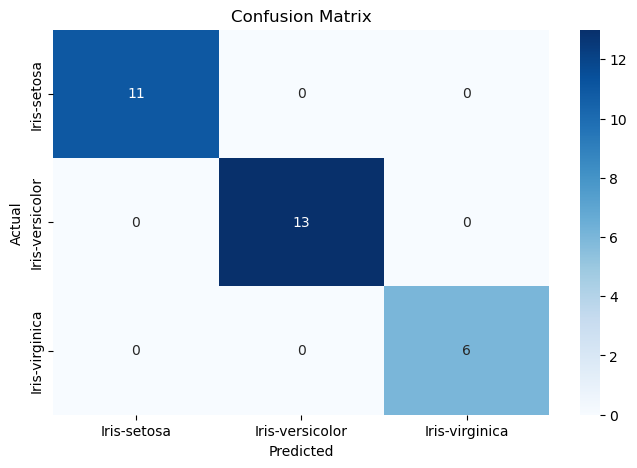

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()